### 1.Business problem understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Dataset Understanding

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
categorical = []
continuous = []
check = []

d_types = dict(df.dtypes)
for name,type in d_types.items():
    if str(type) == 'object':
        categorical.append(name)
    elif str(type) == 'float64':
        continuous.append(name)
    else:
        check.append(name)
        
print("categorical features:",categorical)
print("continuous features:",continuous)
print("features to be checked:",check)

categorical features: []
continuous features: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
features to be checked: ['Class']


In [6]:
d_types = dict(df.dtypes)
for name, type in d_types.items():
    if str(type) == 'object':
        print(f"<=========={name}==========>")
        print(df[name].value_counts())

### 3.Data Preprocessing

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.duplicated().sum()

1081

In [9]:
df.drop_duplicates(inplace=True,ignore_index=True)

#### Train-Test-Split

In [10]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Model & Evaluation

#### Logistic Regression

In [12]:
#modeling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y,cv=5)
print(scores)
print(scores.mean())

train accuracy: 0.9989470437924046
test accuracy: 0.9988193000387693
[0.98220139 0.99962992 0.99913649 0.99924222 0.99864305]
0.9957706152034941


#### confusion matrix

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[56630,    29],
       [   38,    49]], dtype=int64)

### AUC

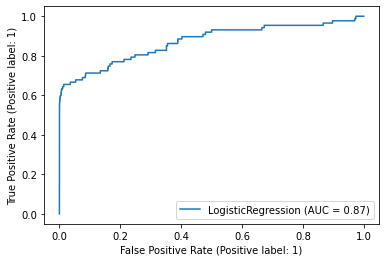

In [14]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)
plt.show()

### KNN

#### Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

#prediction
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X,y,cv=5)
print(scores)
scores.mean()

train accuracy: 0.999563838223632
test accuracy: 0.9994713283755683


#### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,10)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

In [ ]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
knn_bhp = KNeighborsClassifier(n_neighbors=1,p=1)
knn_bhp.fit(X_train,y_train)

#prediction
ypred_train = knn_bhp.predict(X_train)
ypred_test = knn_bhp.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

## DT

In [ ]:
# decision tree classifier - with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Prediction
pred_train = dt.predict(X_train)
base_pred = dt.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X,y,cv=5)
print("cross validation score:",scores.mean())

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,base_pred)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [ ]:
dt.feature_importances_

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = DecisionTreeClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":[1,2,3,4]}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

In [ ]:
# decision tree classifier - with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_bhp = DecisionTreeClassifier(criterion='gini',max_depth=1)
dt_bhp.fit(X_train,y_train)

# Prediction
pred_train = dt_bhp.predict(X_train)
base_pred = dt_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

In [ ]:
def report_model(model):
    model.fit(X_train,y_train)
    model_preds = model.predict(X_test)
    pred_train = model.predict(X_train)
    print("train accyracy:",accuracy_score(pred_train,y_train))
    print("test accyracy:",accuracy_score(model_preds,y_test))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

#### Pruning

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
report_model(pruned_tree)

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
report_model(pruned_tree)

## Rando Forest

In [ ]:
# RandomForestClassifier - with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Prediction
pred_train = rf.predict(X_train)
base_pred = rf.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=5)
print("cross validation score:",scores.mean())

In [ ]:
confusion_matrix(y_test,base_pred)

In [ ]:
rf.feature_importances_

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = RandomForestClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,10))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

In [ ]:
# RandomForestClassifier - with hyper hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_bhp = RandomForestClassifier(n_estimators=1)
rf_bhp.fit(X_train,y_train)

# Prediction
pred_train = rf_bhp.predict(X_train)
base_pred = rf_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

### Ada boost

In [ ]:
# AdaBoost classifier with default parameters
from sklearn.ensemble import AdaBoostClassifier
Ad_default = AdaBoostClassifier()
Ad_default.fit(X_train,y_train)

# Prediction
pred_train = Ad_default.predict(X_train)
base_pred = Ad_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ad_default,X,y,cv=5)
print("cross validation score:",scores.mean())

In [ ]:
Ad_default.feature_importances_

In [ ]:
confusion_matrix(y_test,base_pred)

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_estimator_.feature_importances_

In [ ]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features = feats[feats['Importance']>0.1]
important_features

In [ ]:
imp_features_list=feats[feats['Importance']>0.1].index.to_list()
imp_features_list

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = AdaBoostClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,30))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

In [ ]:
X_imp = X[imp_features_list]  #dropped unimportant
y = df['Outcomes']


Ada_bhp = AdaBoostClassifier(n_estimators=25)
Ada_bhp.fit(X_train,y_train)

# Prediction
pred_train = Ada_bhp.predict(X_train)
base_pred = Ada_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ada_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

## Gradient boosting

In [ ]:
# gradient boosting classifier with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_default = GradientBoostingClassifier()
gb_default.fit(X_train,y_train)


# Prediction
pred_train = gb_default.predict(X_train)
pred_test = gb_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(pred_test,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_default,X,y,cv=5)
print("cross validation score:",scores.mean())

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = GradientBoostingClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,25))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

In [ ]:

gb_default = GradientBoostingClassifier(n_estimators=3)
gb_default.fit(X_train,y_train)


# Prediction
pred_train = gb_default.predict(X_train)
base_pred = gb_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_default,X,y,cv=5)
print("cross validation score:",scores.mean())

## XG Boost

In [ ]:
# XG Boost classifier with default parameters
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

# Prediction
pred_train = xgb.predict(X_train)
base_pred = xgb.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb,X,y,cv=5)
print("cross validation score:",scores.mean())
    

In [ ]:
confusion_matrix(y_test,base_pred)

In [ ]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features = feats[feats['Importance']>0.01]
important_features

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#model
estimator = XGBClassifier()

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,10)),
              'max_depth':list(range(1,10)),
              'gamma':list(range(0,1))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

In [ ]:
X_imp = X[imp_features_list]  #dropped unimportant
y = df['Outcomes']

xgb_bhp = GradientBoostingClassifier()
xgb_bhp.fit(X_train,y_train)


# Prediction
pred_train = xgb_bhp.predict(X_train)
base_pred = xgb_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

### SVM

In [ ]:
#modeling
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

#prediction
ypred_train = svm.predict(X_train)
ypred_test = svm.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm,X,y,cv=5)
print(scores)
print("cross validation:",scores.mean())

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'kernel':['linear','rbf','sigmoid','poly']}

grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X,y)
grid.best_params_

In [ ]:
#modeling
from sklearn.svm import SVC
svm_bhp = SVC(kernel='linear')
svm_bhp.fit(X_train,y_train)

#prediction
ypred_train = svm_bhp.predict(X_train)
ypred_test = svm_bhp.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_bhp,X,y,cv=5)
print(scores)
print("cross validation:",scores.mean())